In [1]:
import xinfer
model = xinfer.create_model("ultralytics/yolov8s-pose", device="cuda", dtype="bfloat16")

2024-11-10 00:35:03.796 | INFO     | xinfer.models:__init__:63 - Model: ultralytics/yolov8s-pose
2024-11-10 00:35:03.797 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-10 00:35:03.797 | INFO     | xinfer.models:__init__:65 - Dtype: bfloat16


100%|██████████| 22.4M/22.4M [00:02<00:00, 10.6MB/s]


In [2]:
result = model.infer("/home/dnth/Downloads/two.jpg")
result


0: 448x640 2 persons, 58.7ms
Speed: 1.7ms preprocess, 58.7ms inference, 70.6ms postprocess per image at shape (1, 3, 448, 640)


Result(categories=None, boxes=None, masks=None, poses=[Pose(keypoints=[[[311.5546875, 58.605472564697266], [316.828125, 51.5390625], [307.546875, 53.4375], [336.234375, 51.22265625], [0.0, 0.0], [371.25, 87.3984375], [314.0859375, 97.1015625], [394.03125, 140.87109375], [307.3359375, 154.16015625], [398.25, 189.80859375], [286.453125, 135.703125], [371.25, 175.78125], [338.1328125, 173.14453125], [326.7421875, 214.8046875], [296.3671875, 200.25], [294.890625, 291.375], [315.984375, 281.671875]]], scores=[[0.98388671875, 0.96630859375, 0.8232421875, 0.88232421875, 0.254150390625, 0.99560546875, 0.99609375, 0.9755859375, 0.97998046875, 0.9716796875, 0.97265625, 0.998046875, 0.998046875, 0.99755859375, 0.99755859375, 0.984375, 0.986328125]], labels=['Nose', 'Left Eye', 'Right Eye', 'Left Ear', 'Right Ear', 'Left Shoulder', 'Right Shoulder', 'Left Elbow', 'Right Elbow', 'Left Wrist', 'Right Wrist', 'Left Hip', 'Right Hip', 'Left Knee', 'Right Knee', 'Left Ankle', 'Right Ankle']), Pose(keyp

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pose(pose, image_path):
    # Load and display the image
    img = plt.imread(image_path)
    
    # Convert keypoints to numpy array
    keypoints = np.array(pose.keypoints[0])
    scores = np.array(pose.scores[0])
    
    # Define connections between keypoints
    connections = [
        (0, 1),  # nose to left eye
        (0, 2),  # nose to right eye
        (1, 3),  # left eye to left ear
        (2, 4),  # right eye to right ear
        (5, 6),  # left shoulder to right shoulder
        (5, 7),  # left shoulder to left elbow
        (6, 8),  # right shoulder to right elbow
        (7, 9),  # left elbow to left wrist
        (8, 10),  # right elbow to right wrist
        (5, 11),  # left shoulder to left hip
        (6, 12),  # right shoulder to right hip
        (11, 12),  # left hip to right hip
        (11, 13),  # left hip to left knee
        (12, 14),  # right hip to right knee
        (13, 15),  # left knee to left ankle
        (14, 16)   # right knee to right ankle
    ]

    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
    # Plot connections (skeleton)
    for connection in connections:
        if scores[connection[0]] > 0.5 and scores[connection[1]] > 0.5:
            plt.plot(
                [keypoints[connection[0]][0], keypoints[connection[1]][0]],
                [keypoints[connection[0]][1], keypoints[connection[1]][1]],
                'b-', linewidth=2, alpha=0.6
            )
    
    # Plot keypoints
    for i, (x, y) in enumerate(keypoints):
        if scores[i] > 0.5:
            plt.plot(x, y, 'ro', markersize=8)
    
    plt.axis('off')  # Hide axes
    plt.title('Pose Estimation')
    plt.show()

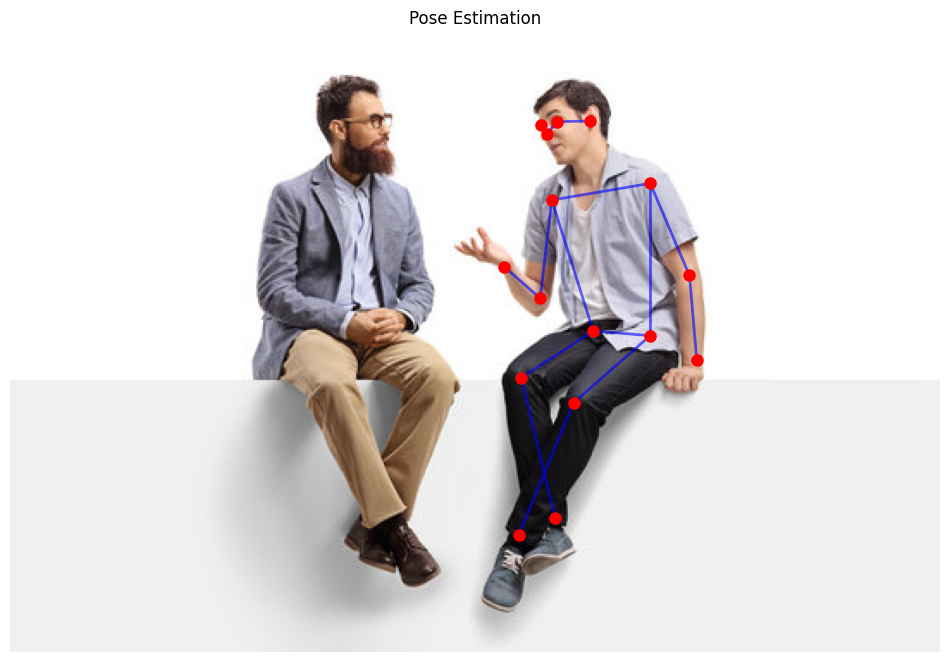

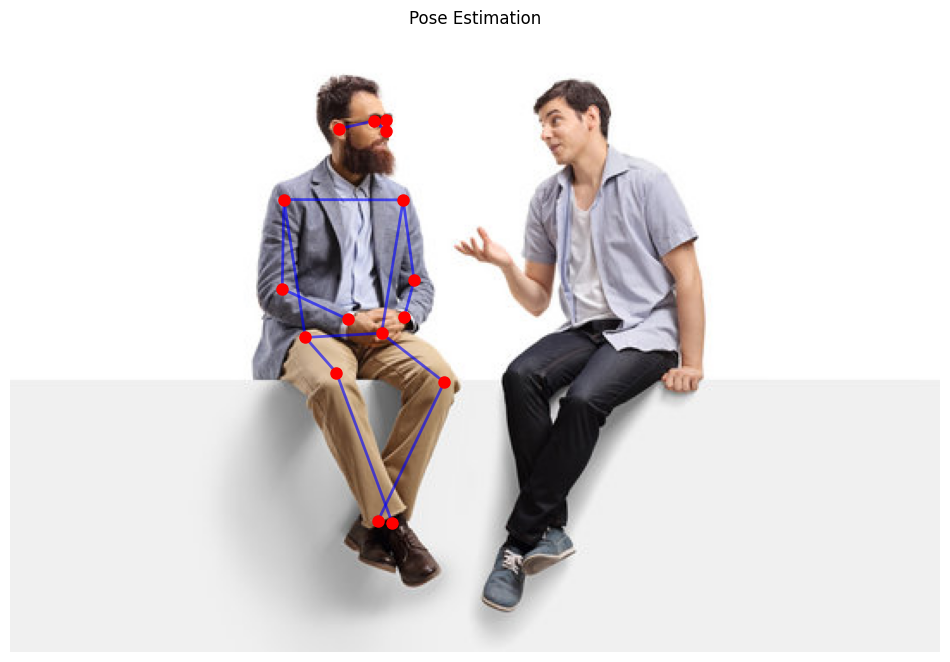

In [4]:
for pose in result.poses:
    plot_pose(pose, "/home/dnth/Downloads/two.jpg")

In [5]:
model.launch_gradio()

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


2024-11-10 00:35:11.927 | INFO     | xinfer.models:__init__:63 - Model: ultralytics/yolov8s-pose
2024-11-10 00:35:11.930 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-10 00:35:11.931 | INFO     | xinfer.models:__init__:65 - Dtype: bfloat16



0: 448x640 1 person, 55.6ms
Speed: 1.2ms preprocess, 55.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
